[View in Colaboratory](https://colab.research.google.com/github/colabtest23/bigdata/blob/keras/CNN_learning_Fashion_MNIST.ipynb)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
Each training and test example is assigned to one of the following labels:
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot 
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

**Learning Approach**: In this experiment objective is to try different models and compare their results. 

*   *Model 1*:  CNN with 1 Convolutional Layer and includes dropout parameter
*   *Model 1a*: Model 1 post Image augmentation


*   *Model 2*:  CNN with 3 Convolutional Layer and includes dropout parameter
*   *Model 2a*: Model 2 post Image augmentation

In [0]:
# Libraries
#Basic
import numpy as np
import pandas as pd

#Keras for NN
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

#Image generator
from keras.preprocessing.image import ImageDataGenerator

#Image handling
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Fashion-mnist data loader.
from keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

np.random.seed(231)
%matplotlib inline


Using TensorFlow backend.


In [0]:
batch_size = 512

In [0]:
# Load data
(X_train_orig ,y_train_orig ), (X_test ,y_test ) = fashion_mnist.load_data()

In [0]:
print('Training data shape : ', X_train_orig.shape, y_train_orig.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=231)


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)


In [0]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)


In [0]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),#Prevents overfitting
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [0]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [0]:
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn1_metrics = cnn1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 76us/step - loss: 11.4950 - acc: 0.2858 - val_loss: 11.3497 - val_acc: 0.2954
Epoch 2/10
48000/48000 [==============================] - 2s 43us/step - loss: 11.3835 - acc: 0.2935 - val_loss: 11.3381 - val_acc: 0.2963
Epoch 3/10
48000/48000 [==============================] - 2s 43us/step - loss: 10.9604 - acc: 0.3194 - val_loss: 10.1788 - val_acc: 0.3675
Epoch 4/10
48000/48000 [==============================] - 2s 43us/step - loss: 8.5717 - acc: 0.4651 - val_loss: 7.0179 - val_acc: 0.5605
Epoch 5/10
48000/48000 [==============================] - 2s 43us/step - loss: 7.0074 - acc: 0.5610 - val_loss: 6.8061 - val_acc: 0.5741
Epoch 6/10
48000/48000 [==============================] - 2s 43us/step - loss: 6.6053 - acc: 0.5782 - val_loss: 5.1974 - val_acc: 0.6566
Epoch 7/10
 6656/48000 [===>..........................] - ETA: 1s - loss: 4.6419 - acc: 0.6761

48000/48000 [==============================] - 2s 43us/step - loss: 1.4721 - acc: 0.7961 - val_loss: 0.3776 - val_acc: 0.8661
Epoch 8/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.3288 - acc: 0.8831 - val_loss: 0.3208 - val_acc: 0.8898
Epoch 9/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.2693 - acc: 0.8999 - val_loss: 0.3058 - val_acc: 0.8933
Epoch 10/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.2342 - acc: 0.9132 - val_loss: 0.2985 - val_acc: 0.8977


In [0]:
cnn1.optimizer.lr = 0.0001


In [0]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.2069 - acc: 0.9220 - val_loss: 0.2981 - val_acc: 0.8982
Epoch 2/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1906 - acc: 0.9279 - val_loss: 0.2939 - val_acc: 0.9003
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1719 - acc: 0.9336 - val_loss: 0.2942 - val_acc: 0.8995
Epoch 4/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1575 - acc: 0.9405 - val_loss: 0.3075 - val_acc: 0.9021
Epoch 5/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1438 - acc: 0.9456 - val_loss: 0.3049 - val_acc: 0.9017
Epoch 6/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1343 - acc: 0.9504 - val_loss: 0.3241 - val_acc: 0.9015
Epoch 7/10
 8192/48000 [====>.........................] - ETA: 1s - loss: 0.1219 - acc: 0.9540

48000/48000 [==============================] - 2s 43us/step - loss: 0.1212 - acc: 0.9537 - val_loss: 0.3295 - val_acc: 0.9032
Epoch 8/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1143 - acc: 0.9578 - val_loss: 0.3358 - val_acc: 0.8981
Epoch 9/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1070 - acc: 0.9605 - val_loss: 0.3491 - val_acc: 0.9023
Epoch 10/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1013 - acc: 0.9619 - val_loss: 0.3549 - val_acc: 0.9015


In [0]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3555314741849899
Test accuracy: 0.9035


### Observation:
*Lowering the learning rate in next iteration improved the accuracy for the same model from **89.77 % to 90.35%***

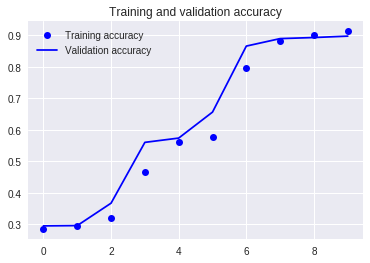

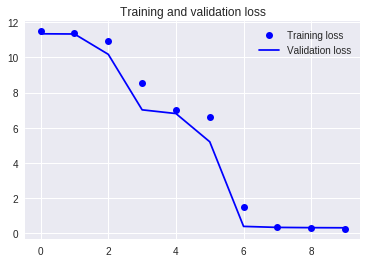

In [0]:
accuracy = cnn1_metrics.history['acc']
val_accuracy = cnn1_metrics.history['val_acc']
loss = cnn1_metrics.history['loss']
val_loss = cnn1_metrics.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Observation:
Introduction of drop rate resulted in similar Validation and Training accuracy indicating:
as it avoids weight learning by nodes

*   Model is not overfitting and weights are not being memorized
*   Model will be more generalized and will give better accuracy to other sets of data
*   Model has a better accuracy on Validation data as acompared to training data after couple of epoch till 8th epoch
*   Validation loss staganates after 7th epoch



Data **Augmentation**

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)


In [0]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50,
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)


Epoch 1/50
93/93 [==============================] - 16s 176ms/step - loss: 0.5448 - acc: 0.7980 - val_loss: 0.4740 - val_acc: 0.8266
Epoch 2/50
93/93 [==============================] - 17s 182ms/step - loss: 0.4535 - acc: 0.8286 - val_loss: 0.4331 - val_acc: 0.8385
Epoch 3/50
93/93 [==============================] - 17s 182ms/step - loss: 0.4305 - acc: 0.8389 - val_loss: 0.4107 - val_acc: 0.8476
Epoch 4/50
81/93 [=========================>....] - ETA: 1s - loss: 0.4129 - acc: 0.8457

93/93 [==============================] - 17s 181ms/step - loss: 0.4104 - acc: 0.8464 - val_loss: 0.4033 - val_acc: 0.8509
Epoch 5/50
93/93 [==============================] - 17s 180ms/step - loss: 0.4009 - acc: 0.8482 - val_loss: 0.3997 - val_acc: 0.8499
Epoch 6/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3897 - acc: 0.8526 - val_loss: 0.3715 - val_acc: 0.8620
Epoch 7/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3798 - acc: 0.8563 - val_loss: 0.3671 - val_acc: 0.8594
Epoch 8/50
12/93 [==>...........................] - ETA: 6s - loss: 0.3845 - acc: 0.8563

93/93 [==============================] - 17s 178ms/step - loss: 0.3740 - acc: 0.8589 - val_loss: 0.3638 - val_acc: 0.8653
Epoch 9/50
93/93 [==============================] - 16s 176ms/step - loss: 0.3683 - acc: 0.8595 - val_loss: 0.3639 - val_acc: 0.8620
Epoch 10/50
93/93 [==============================] - 16s 175ms/step - loss: 0.3631 - acc: 0.8618 - val_loss: 0.3560 - val_acc: 0.8691
Epoch 11/50
93/93 [==============================] - 16s 175ms/step - loss: 0.3539 - acc: 0.8664 - val_loss: 0.3552 - val_acc: 0.8679
Epoch 12/50
 9/93 [=>............................] - ETA: 2s - loss: 0.3784 - acc: 0.8590

93/93 [==============================] - 16s 173ms/step - loss: 0.3549 - acc: 0.8658 - val_loss: 0.3503 - val_acc: 0.8732
Epoch 13/50
93/93 [==============================] - 16s 172ms/step - loss: 0.3452 - acc: 0.8697 - val_loss: 0.3454 - val_acc: 0.8736
Epoch 14/50
93/93 [==============================] - 16s 172ms/step - loss: 0.3451 - acc: 0.8678 - val_loss: 0.3460 - val_acc: 0.8724
Epoch 15/50
93/93 [==============================] - 16s 173ms/step - loss: 0.3373 - acc: 0.8722 - val_loss: 0.3426 - val_acc: 0.8720
Epoch 16/50
 9/93 [=>............................] - ETA: 2s - loss: 0.3645 - acc: 0.8646

93/93 [==============================] - 16s 174ms/step - loss: 0.3435 - acc: 0.8710 - val_loss: 0.3446 - val_acc: 0.8753
Epoch 17/50
93/93 [==============================] - 16s 174ms/step - loss: 0.3355 - acc: 0.8723 - val_loss: 0.3471 - val_acc: 0.8708
Epoch 18/50
93/93 [==============================] - 16s 175ms/step - loss: 0.3244 - acc: 0.8765 - val_loss: 0.3393 - val_acc: 0.8740
Epoch 19/50
93/93 [==============================] - 16s 175ms/step - loss: 0.3335 - acc: 0.8716 - val_loss: 0.3277 - val_acc: 0.8798
Epoch 20/50
 7/93 [=>............................] - ETA: 2s - loss: 0.3480 - acc: 0.8691

93/93 [==============================] - 16s 175ms/step - loss: 0.3273 - acc: 0.8783 - val_loss: 0.3285 - val_acc: 0.8814
Epoch 21/50
93/93 [==============================] - 16s 175ms/step - loss: 0.3221 - acc: 0.8778 - val_loss: 0.3238 - val_acc: 0.8810
Epoch 22/50
93/93 [==============================] - 16s 176ms/step - loss: 0.3257 - acc: 0.8768 - val_loss: 0.3340 - val_acc: 0.8776
Epoch 23/50
93/93 [==============================] - 16s 174ms/step - loss: 0.3208 - acc: 0.8777 - val_loss: 0.3270 - val_acc: 0.8813
Epoch 24/50
 9/93 [=>............................] - ETA: 2s - loss: 0.3078 - acc: 0.8889

93/93 [==============================] - 16s 175ms/step - loss: 0.3238 - acc: 0.8789 - val_loss: 0.3263 - val_acc: 0.8796
Epoch 25/50
93/93 [==============================] - 16s 175ms/step - loss: 0.3141 - acc: 0.8791 - val_loss: 0.3276 - val_acc: 0.8773
Epoch 26/50
93/93 [==============================] - 16s 177ms/step - loss: 0.3148 - acc: 0.8795 - val_loss: 0.3261 - val_acc: 0.8861
Epoch 27/50
93/93 [==============================] - 16s 176ms/step - loss: 0.3114 - acc: 0.8813 - val_loss: 0.3165 - val_acc: 0.8827
Epoch 28/50
 5/93 [>.............................] - ETA: 2s - loss: 0.3078 - acc: 0.8875

93/93 [==============================] - 16s 174ms/step - loss: 0.3139 - acc: 0.8816 - val_loss: 0.3257 - val_acc: 0.8786
Epoch 29/50
93/93 [==============================] - 16s 176ms/step - loss: 0.3076 - acc: 0.8841 - val_loss: 0.3164 - val_acc: 0.8816
Epoch 30/50
93/93 [==============================] - 16s 176ms/step - loss: 0.3041 - acc: 0.8853 - val_loss: 0.3132 - val_acc: 0.8815
Epoch 31/50
93/93 [==============================] - 16s 174ms/step - loss: 0.3110 - acc: 0.8829 - val_loss: 0.3328 - val_acc: 0.8784
Epoch 32/50
 7/93 [=>............................] - ETA: 2s - loss: 0.3111 - acc: 0.8817

93/93 [==============================] - 16s 172ms/step - loss: 0.3025 - acc: 0.8851 - val_loss: 0.3122 - val_acc: 0.8873
Epoch 33/50
93/93 [==============================] - 16s 173ms/step - loss: 0.3029 - acc: 0.8857 - val_loss: 0.3227 - val_acc: 0.8803
Epoch 34/50
93/93 [==============================] - 16s 172ms/step - loss: 0.3061 - acc: 0.8842 - val_loss: 0.3132 - val_acc: 0.8818
Epoch 35/50
93/93 [==============================] - 16s 173ms/step - loss: 0.3002 - acc: 0.8867 - val_loss: 0.3187 - val_acc: 0.8833
Epoch 36/50
 9/93 [=>............................] - ETA: 2s - loss: 0.2988 - acc: 0.8864

93/93 [==============================] - 16s 176ms/step - loss: 0.2969 - acc: 0.8867 - val_loss: 0.3078 - val_acc: 0.8863
Epoch 37/50
93/93 [==============================] - 17s 178ms/step - loss: 0.2956 - acc: 0.8881 - val_loss: 0.3067 - val_acc: 0.8904
Epoch 38/50
93/93 [==============================] - 17s 185ms/step - loss: 0.2960 - acc: 0.8880 - val_loss: 0.3094 - val_acc: 0.8844
Epoch 39/50
93/93 [==============================] - 17s 178ms/step - loss: 0.2851 - acc: 0.8921 - val_loss: 0.3114 - val_acc: 0.8854
Epoch 40/50
 9/93 [=>............................] - ETA: 2s - loss: 0.3013 - acc: 0.8827

93/93 [==============================] - 16s 174ms/step - loss: 0.2919 - acc: 0.8907 - val_loss: 0.3028 - val_acc: 0.8876
Epoch 41/50
93/93 [==============================] - 16s 176ms/step - loss: 0.2906 - acc: 0.8899 - val_loss: 0.3048 - val_acc: 0.8908
Epoch 42/50
93/93 [==============================] - 16s 175ms/step - loss: 0.2910 - acc: 0.8883 - val_loss: 0.3029 - val_acc: 0.8902
Epoch 43/50
93/93 [==============================] - 16s 175ms/step - loss: 0.2897 - acc: 0.8893 - val_loss: 0.2999 - val_acc: 0.8928
Epoch 44/50
 9/93 [=>............................] - ETA: 2s - loss: 0.2715 - acc: 0.8939

93/93 [==============================] - 17s 179ms/step - loss: 0.2900 - acc: 0.8892 - val_loss: 0.3093 - val_acc: 0.8850
Epoch 45/50
93/93 [==============================] - 17s 182ms/step - loss: 0.2869 - acc: 0.8902 - val_loss: 0.3011 - val_acc: 0.8922
Epoch 46/50
93/93 [==============================] - 16s 177ms/step - loss: 0.2874 - acc: 0.8899 - val_loss: 0.3106 - val_acc: 0.8886
Epoch 47/50
93/93 [==============================] - 16s 173ms/step - loss: 0.2832 - acc: 0.8929 - val_loss: 0.3068 - val_acc: 0.8882
Epoch 48/50
 9/93 [=>............................] - ETA: 2s - loss: 0.2847 - acc: 0.8889

93/93 [==============================] - 16s 172ms/step - loss: 0.2801 - acc: 0.8914 - val_loss: 0.3105 - val_acc: 0.8888
Epoch 49/50
93/93 [==============================] - 16s 176ms/step - loss: 0.2828 - acc: 0.8927 - val_loss: 0.3154 - val_acc: 0.8841
Epoch 50/50
93/93 [==============================] - 16s 175ms/step - loss: 0.2788 - acc: 0.8960 - val_loss: 0.3165 - val_acc: 0.8887


In [0]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.35117446608543396
Test accuracy: 0.8912


CNN with 3 Convolutional Layers

In [0]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


In [0]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [0]:
cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [0]:
cnn2_metrics = cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 85us/step - loss: 2.2384 - acc: 0.5946 - val_loss: 0.5892 - val_acc: 0.7918
Epoch 2/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.6123 - acc: 0.7724 - val_loss: 0.4827 - val_acc: 0.8302
Epoch 3/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.5054 - acc: 0.8120 - val_loss: 0.3994 - val_acc: 0.8559
Epoch 4/10
48000/48000 [==============================] - 3s 71us/step - loss: 0.4466 - acc: 0.8359 - val_loss: 0.3581 - val_acc: 0.8698
Epoch 5/10
44544/48000 [==========================>...] - ETA: 0s - loss: 0.4124 - acc: 0.8496

48000/48000 [==============================] - 3s 72us/step - loss: 0.4096 - acc: 0.8505 - val_loss: 0.3363 - val_acc: 0.8802
Epoch 6/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.3872 - acc: 0.8580 - val_loss: 0.3171 - val_acc: 0.8886
Epoch 7/10
48000/48000 [==============================] - 3s 71us/step - loss: 0.3638 - acc: 0.8664 - val_loss: 0.3054 - val_acc: 0.8918
Epoch 8/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.3487 - acc: 0.8713 - val_loss: 0.3049 - val_acc: 0.8907
Epoch 9/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.3345 - acc: 0.8766 - val_loss: 0.3029 - val_acc: 0.8909
Epoch 10/10
17920/48000 [==========>...................] - ETA: 2s - loss: 0.3280 - acc: 0.8783

48000/48000 [==============================] - 3s 71us/step - loss: 0.3273 - acc: 0.8797 - val_loss: 0.2961 - val_acc: 0.8944


In [0]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30229801898002623
Test accuracy: 0.8894


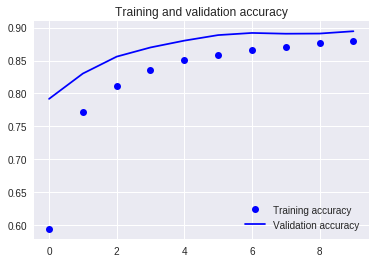

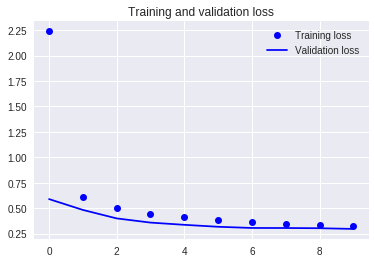

In [0]:
accuracy = cnn2_metrics.history['acc']
val_accuracy = cnn2_metrics.history['val_acc']
loss = cnn2_metrics.history['loss']
val_loss = cnn2_metrics.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Data Augmentation

In [0]:
cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50,
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)


Epoch 1/50
93/93 [==============================] - 18s 191ms/step - loss: 0.5214 - acc: 0.8055 - val_loss: 0.4236 - val_acc: 0.8442
Epoch 2/50
93/93 [==============================] - 18s 190ms/step - loss: 0.4679 - acc: 0.8257 - val_loss: 0.3911 - val_acc: 0.8572
Epoch 3/50
93/93 [==============================] - 18s 190ms/step - loss: 0.4523 - acc: 0.8299 - val_loss: 0.3887 - val_acc: 0.8558
Epoch 4/50
79/93 [========================>.....] - ETA: 2s - loss: 0.4408 - acc: 0.8353

93/93 [==============================] - 18s 189ms/step - loss: 0.4417 - acc: 0.8355 - val_loss: 0.3825 - val_acc: 0.8590
Epoch 5/50
93/93 [==============================] - 17s 187ms/step - loss: 0.4224 - acc: 0.8420 - val_loss: 0.3683 - val_acc: 0.8623
Epoch 6/50
93/93 [==============================] - 18s 189ms/step - loss: 0.4216 - acc: 0.8425 - val_loss: 0.3477 - val_acc: 0.8736
Epoch 7/50
93/93 [==============================] - 17s 186ms/step - loss: 0.4131 - acc: 0.8473 - val_loss: 0.3541 - val_acc: 0.8745
Epoch 8/50
11/93 [==>...........................] - ETA: 7s - loss: 0.3868 - acc: 0.8587

93/93 [==============================] - 17s 185ms/step - loss: 0.4040 - acc: 0.8494 - val_loss: 0.3370 - val_acc: 0.8747
Epoch 9/50
93/93 [==============================] - 17s 183ms/step - loss: 0.3956 - acc: 0.8535 - val_loss: 0.3519 - val_acc: 0.8702
Epoch 10/50
93/93 [==============================] - 17s 183ms/step - loss: 0.3859 - acc: 0.8546 - val_loss: 0.3400 - val_acc: 0.8757
Epoch 11/50
93/93 [==============================] - 17s 183ms/step - loss: 0.3823 - acc: 0.8556 - val_loss: 0.3321 - val_acc: 0.8775
Epoch 12/50
 5/93 [>.............................] - ETA: 3s - loss: 0.3327 - acc: 0.8688

93/93 [==============================] - 17s 181ms/step - loss: 0.3759 - acc: 0.8602 - val_loss: 0.3312 - val_acc: 0.8782
Epoch 13/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3692 - acc: 0.8632 - val_loss: 0.3250 - val_acc: 0.8828
Epoch 14/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3664 - acc: 0.8638 - val_loss: 0.3186 - val_acc: 0.8832
Epoch 15/50
93/93 [==============================] - 17s 183ms/step - loss: 0.3687 - acc: 0.8609 - val_loss: 0.3262 - val_acc: 0.8792
Epoch 16/50
 2/93 [..............................] - ETA: 5s - loss: 0.3745 - acc: 0.8516

93/93 [==============================] - 17s 181ms/step - loss: 0.3623 - acc: 0.8626 - val_loss: 0.3100 - val_acc: 0.8853
Epoch 17/50
93/93 [==============================] - 17s 178ms/step - loss: 0.3541 - acc: 0.8677 - val_loss: 0.3270 - val_acc: 0.8798
Epoch 18/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3566 - acc: 0.8665 - val_loss: 0.3179 - val_acc: 0.8828
Epoch 19/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3600 - acc: 0.8650 - val_loss: 0.3069 - val_acc: 0.8871
Epoch 20/50
 3/93 [..............................] - ETA: 4s - loss: 0.3725 - acc: 0.8704

93/93 [==============================] - 17s 179ms/step - loss: 0.3448 - acc: 0.8711 - val_loss: 0.3092 - val_acc: 0.8851
Epoch 21/50
93/93 [==============================] - 17s 178ms/step - loss: 0.3491 - acc: 0.8688 - val_loss: 0.3115 - val_acc: 0.8865
Epoch 22/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3430 - acc: 0.8711 - val_loss: 0.3230 - val_acc: 0.8774
Epoch 23/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3409 - acc: 0.8715 - val_loss: 0.3014 - val_acc: 0.8897
Epoch 24/50
 2/93 [..............................] - ETA: 5s - loss: 0.3301 - acc: 0.8770

93/93 [==============================] - 17s 180ms/step - loss: 0.3380 - acc: 0.8722 - val_loss: 0.3216 - val_acc: 0.8817
Epoch 25/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3366 - acc: 0.8746 - val_loss: 0.3049 - val_acc: 0.8905
Epoch 26/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3311 - acc: 0.8745 - val_loss: 0.3072 - val_acc: 0.8895
Epoch 27/50
89/93 [===========================>..] - ETA: 0s - loss: 0.3399 - acc: 0.8713

93/93 [==============================] - 17s 182ms/step - loss: 0.3392 - acc: 0.8717 - val_loss: 0.3139 - val_acc: 0.8814
Epoch 28/50
93/93 [==============================] - 17s 178ms/step - loss: 0.3347 - acc: 0.8741 - val_loss: 0.3048 - val_acc: 0.8899
Epoch 29/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3291 - acc: 0.8753 - val_loss: 0.3030 - val_acc: 0.8879
Epoch 30/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3225 - acc: 0.8800 - val_loss: 0.2891 - val_acc: 0.8923
Epoch 31/50
16/93 [====>.........................] - ETA: 5s - loss: 0.3292 - acc: 0.8717

93/93 [==============================] - 17s 178ms/step - loss: 0.3251 - acc: 0.8779 - val_loss: 0.2888 - val_acc: 0.8947
Epoch 32/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3244 - acc: 0.8786 - val_loss: 0.2984 - val_acc: 0.8899
Epoch 33/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3200 - acc: 0.8798 - val_loss: 0.2909 - val_acc: 0.8932
Epoch 34/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3200 - acc: 0.8807 - val_loss: 0.2884 - val_acc: 0.8929
Epoch 35/50
 4/93 [>.............................] - ETA: 5s - loss: 0.3284 - acc: 0.8784

93/93 [==============================] - 17s 180ms/step - loss: 0.3228 - acc: 0.8782 - val_loss: 0.2878 - val_acc: 0.8951
Epoch 36/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3224 - acc: 0.8798 - val_loss: 0.2920 - val_acc: 0.8919
Epoch 37/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3164 - acc: 0.8785 - val_loss: 0.2882 - val_acc: 0.8950
Epoch 38/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3147 - acc: 0.8813 - val_loss: 0.2885 - val_acc: 0.8944
Epoch 39/50
 1/93 [..............................] - ETA: 5s - loss: 0.2767 - acc: 0.9004

93/93 [==============================] - 17s 181ms/step - loss: 0.3112 - acc: 0.8840 - val_loss: 0.2825 - val_acc: 0.8970
Epoch 40/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3179 - acc: 0.8813 - val_loss: 0.2924 - val_acc: 0.8922
Epoch 41/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3137 - acc: 0.8811 - val_loss: 0.2893 - val_acc: 0.8943
Epoch 42/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3114 - acc: 0.8834 - val_loss: 0.3045 - val_acc: 0.8893
Epoch 43/50
 5/93 [>.............................] - ETA: 4s - loss: 0.2895 - acc: 0.8984

93/93 [==============================] - 17s 180ms/step - loss: 0.3030 - acc: 0.8858 - val_loss: 0.2740 - val_acc: 0.8997
Epoch 44/50
93/93 [==============================] - 17s 179ms/step - loss: 0.3009 - acc: 0.8875 - val_loss: 0.2741 - val_acc: 0.8988
Epoch 45/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3039 - acc: 0.8855 - val_loss: 0.2838 - val_acc: 0.8944
Epoch 46/50
93/93 [==============================] - 17s 181ms/step - loss: 0.3114 - acc: 0.8835 - val_loss: 0.2939 - val_acc: 0.8937


Epoch 47/50
93/93 [==============================] - 17s 180ms/step - loss: 0.3027 - acc: 0.8872 - val_loss: 0.2759 - val_acc: 0.8962
Epoch 48/50
93/93 [==============================] - 17s 179ms/step - loss: 0.2999 - acc: 0.8879 - val_loss: 0.2857 - val_acc: 0.8919
Epoch 49/50
93/93 [==============================] - 17s 182ms/step - loss: 0.3072 - acc: 0.8841 - val_loss: 0.2739 - val_acc: 0.8998
Epoch 50/50
84/93 [==========================>...] - ETA: 1s - loss: 0.2964 - acc: 0.8873

93/93 [==============================] - 17s 178ms/step - loss: 0.2981 - acc: 0.8865 - val_loss: 0.2851 - val_acc: 0.8950


In [0]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27610876560211184
Test accuracy: 0.8969


### Observation
Test accuracy increased slightly to **89.69% from 88.94% **post image augmentaion.

In [0]:
predicted_classes = cnn1.predict(X_test)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [0]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.80      0.79      0.79      1000
    Class 1       0.98      0.98      0.98      1000
    Class 2       0.92      0.64      0.76      1000
    Class 3       0.92      0.87      0.90      1000
    Class 4       0.80      0.88      0.84      1000
    Class 5       0.97      0.99      0.98      1000
    Class 6       0.64      0.81      0.72      1000
    Class 7       0.95      0.97      0.96      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.90      0.89      0.89     10000



### Observation:
Best performing classes are #1, #5, #7, #8 and #9